In [2]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

# library design specific tools
from ImageAnalysis3.library_tools import LibraryDesigner as ld
from ImageAnalysis3.library_tools import LibraryTools as lt
# biopython imports
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast.Applications import NcbiblastnCommandline
from Bio.Blast import NCBIXML

19104


In [3]:
## Some folders
# human genome
reference_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\Genomes\mouse\GRCm38_ensembl'
genome_folder = os.path.join(reference_folder, 'Genome')
# Library directories
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain'
if not os.path.exists(pool_folder):
    print(f"Create pool_folder: {pool_folder}")
    os.makedirs(pool_folder)
else:
    print(f"Use pool_folder: {pool_folder}")

Use pool_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain


In [4]:
# folder for sub-pool
library_folder = os.path.join(pool_folder, f'mouse_brain_relabel_chr7')
if not os.path.exists(library_folder):
    print(f"create library folder: {library_folder}")
    os.makedirs(library_folder)
# folder for fasta sequences
sequence_folder = os.path.join(library_folder, 'sequences')
if not os.path.exists(sequence_folder):
    print(f"create sequence folder: {sequence_folder}")
    os.makedirs(sequence_folder)
# folder to save result probes
report_folder = os.path.join(library_folder, 'reports')
if not os.path.exists(report_folder):
    print(f"create report folder: {report_folder}")
    os.makedirs(report_folder)
    
print(f"-- library_folder: {library_folder}")
print(f"-- sequence_folder: {sequence_folder}")
print(f"-- report_folder: {report_folder}")

-- library_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7
-- sequence_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\sequences
-- report_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\reports


In [5]:
sel_chr = '7'

In [6]:
import pandas as pd
save_folder = os.path.join(library_folder, 'Summary_tables')

if not os.path.exists(save_folder):
    print(f"Create save_folder: {save_folder}")
    os.makedirs(save_folder)
else:
    print(f"Use save_folder: {save_folder}")

Create save_folder: \\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\Summary_tables


In [7]:
# load probes
probes = []
final_pb_filename = os.path.join(library_folder, 'blast_full_probes.fasta')

with open(final_pb_filename, 'r') as handle:
    for record in SeqIO.parse(handle, "fasta"):
        probes.append(record)

In [8]:
# load region names and real coordinates
region_2_names = {}
region_2_coords = {}
for _pb in probes:
    _reg = _pb.id.split('loc_')[1].split('_')[0]
    _start, _end = _reg.split(':')[1].split('-')
    # gene info
    _gene = _pb.id.split('gene_')[1].split('_')[0]
    _pb_pos = int(_pb.id.split('pos_')[1].split('_')[0]) + int(_start)
    
    if _gene not in region_2_names:
        region_2_names[_gene] = _reg
    if _gene not in region_2_coords:
        region_2_coords[_gene] = [_pb_pos]
    else:
        region_2_coords[_gene].append(_pb_pos)
print(region_2_names)

{'383': '7:6225207-6245207', '384': '7:16228012-16248012', '385': '7:18720071-18740071', '386': '7:26224483-26244483', '387': '7:28730208-28750208', '388': '7:31221413-31241413', '389': '7:33720106-33740106', '390': '7:36230665-36250665', '391': '7:43720140-43740140', '392': '7:46231598-46251598', '393': '7:48731492-48751492', '394': '7:51231184-51251184', '395': '7:53729537-53749537', '396': '7:56227769-56247769', '397': '7:58732210-58752210', '398': '7:61221628-61241628', '399': '7:63733717-63753717', '400': '7:66232902-66252902', '401': '7:68728543-68748543', '402': '7:71229261-71249261', '403': '7:73731066-73751066', '404': '7:76225000-76245000', '405': '7:78732414-78752414', '406': '7:81227806-81247806', '407': '7:83728496-83748496', '408': '7:86220611-86240611', '409': '7:88725370-88745370', '410': '7:91227463-91247463', '411': '7:93720090-93740090', '412': '7:96232288-96252288', '413': '7:98732625-98752625', '414': '7:101226642-101246642', '415': '7:103724092-103744092', '416': 

In [12]:
len(region_2_probeInfo)

96

In [9]:
# generate dict
pb_len = 42
min_probe_num = 10

region_2_probeInfo = {}
for _gene in region_2_coords:
    _name = region_2_names[_gene]
    _chr = _name.split(':')[0]
    _coords = region_2_coords[_gene]
    if len(_coords) < min_probe_num:
        continue
    _info = f"{_chr}:{np.min(_coords)}-{np.max(_coords)+pb_len}"
    region_2_probeInfo[_gene] = _info

In [14]:
# copied from the original code
region_2_readout_dict = {}
for _i, _reg in enumerate(region_2_probeInfo):
    region_2_readout_dict[_reg] = [f"u{_i}", f"u{_i+len(region_2_probeInfo)}"]
print(region_2_readout_dict)

{'383': ['u0', 'u96'], '384': ['u1', 'u97'], '385': ['u2', 'u98'], '386': ['u3', 'u99'], '387': ['u4', 'u100'], '388': ['u5', 'u101'], '389': ['u6', 'u102'], '390': ['u7', 'u103'], '391': ['u8', 'u104'], '392': ['u9', 'u105'], '393': ['u10', 'u106'], '394': ['u11', 'u107'], '395': ['u12', 'u108'], '396': ['u13', 'u109'], '397': ['u14', 'u110'], '398': ['u15', 'u111'], '399': ['u16', 'u112'], '400': ['u17', 'u113'], '401': ['u18', 'u114'], '402': ['u19', 'u115'], '403': ['u20', 'u116'], '404': ['u21', 'u117'], '405': ['u22', 'u118'], '406': ['u23', 'u119'], '407': ['u24', 'u120'], '408': ['u25', 'u121'], '409': ['u26', 'u122'], '410': ['u27', 'u123'], '411': ['u28', 'u124'], '412': ['u29', 'u125'], '413': ['u30', 'u126'], '414': ['u31', 'u127'], '415': ['u32', 'u128'], '416': ['u33', 'u129'], '417': ['u34', 'u130'], '418': ['u35', 'u131'], '419': ['u36', 'u132'], '420': ['u37', 'u133'], '421': ['u38', 'u134'], '422': ['u39', 'u135'], '423': ['u40', 'u136'], '424': ['u41', 'u137'], '425'

In [15]:
# load used readouts
readout_usage_file = os.path.join(library_folder, 'readout_usage.pkl')
readout_dict = pickle.load(open(readout_usage_file, 'rb'))

In [16]:
readout_dict

{'u': [SeqRecord(seq=Seq('ACAAATCCGACCAGATCGGACGATCATGGG'), id='Stv_3', name='Stv_3', description='Stv_3 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AGACGACGCACGTTCGTACCGCGTACTTCG'), id='Stv_32', name='Stv_32', description='Stv_32 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('TTCCCGCCAATGACGTCGGTTTGGACGAGA'), id='Stv_91', name='Stv_91', description='Stv_91 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('CAAGTATGCAGCGCGATTGACCGTCTCGTT'), id='Stv_4', name='Stv_4', description='Stv_4 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('TTTGCTCGCAAGTGCGCACGAGTTGAACTG'), id='Stv_33', name='Stv_33', description='Stv_33 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('GCGTTGATGTCCCTTGTGAGCGCCCGACAT'), id='Stv_92', name='Stv_92', description='Stv_92 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AAGTCGTACGCCGATGCGCAGCAATTCACT'), id='Stv_5', name='Stv_5', description='Stv_5 old_barcode', dbxrefs=[]),
  SeqRecord(seq=Seq('AGTTTCCATACGCGGCGTGAATATCGCGGC'), id='Stv_35', name='Stv_35', description

## bit_2_readout

In [43]:
dtype_dict = {_v:_k for _k,_v in ia.classes._allowed_kwds.items()}

for _dtype, _records in readout_dict.items():
    
    bit_readout_df = pd.DataFrame([[_i+1, _r.id] for _i, _r in enumerate(_records)], columns=['Bit','ReadoutName'])
    save_filename = os.path.join(save_folder, f'CTP14-{os.path.basename(library_folder)}_{dtype_dict[_dtype]}_readouts.csv')
    print(save_filename)
    bit_readout_df.to_csv(save_filename, index=False)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\Summary_tables\CTP14-mouse_brain_relabel_chr7_unique_readouts.csv


In [45]:
mp

NameError: name 'mp' is not defined

In [18]:
bit_readout_df

,Bit,ReadoutName
0,1,Stv_3
1,2,Stv_32
2,3,Stv_91
3,4,Stv_4
4,5,Stv_33
...,...,...
187,188,NDB_113
188,189,NDB_114
189,190,NDB_115
190,191,NDB_116


# Codebook

In [22]:
region_2_readout_dict

{'383': ['u0', 'u96'],
 '384': ['u1', 'u97'],
 '385': ['u2', 'u98'],
 '386': ['u3', 'u99'],
 '387': ['u4', 'u100'],
 '388': ['u5', 'u101'],
 '389': ['u6', 'u102'],
 '390': ['u7', 'u103'],
 '391': ['u8', 'u104'],
 '392': ['u9', 'u105'],
 '393': ['u10', 'u106'],
 '394': ['u11', 'u107'],
 '395': ['u12', 'u108'],
 '396': ['u13', 'u109'],
 '397': ['u14', 'u110'],
 '398': ['u15', 'u111'],
 '399': ['u16', 'u112'],
 '400': ['u17', 'u113'],
 '401': ['u18', 'u114'],
 '402': ['u19', 'u115'],
 '403': ['u20', 'u116'],
 '404': ['u21', 'u117'],
 '405': ['u22', 'u118'],
 '406': ['u23', 'u119'],
 '407': ['u24', 'u120'],
 '408': ['u25', 'u121'],
 '409': ['u26', 'u122'],
 '410': ['u27', 'u123'],
 '411': ['u28', 'u124'],
 '412': ['u29', 'u125'],
 '413': ['u30', 'u126'],
 '414': ['u31', 'u127'],
 '415': ['u32', 'u128'],
 '416': ['u33', 'u129'],
 '417': ['u34', 'u130'],
 '418': ['u35', 'u131'],
 '419': ['u36', 'u132'],
 '420': ['u37', 'u133'],
 '421': ['u38', 'u134'],
 '422': ['u39', 'u135'],
 '423': ['u40'

In [31]:
_bits

['u95', 'u191']

In [32]:
# generate the codebook
dtype_char = 'u'
codebook = pd.DataFrame(columns=['name','id']+[_r.id for _r in readout_dict[dtype_char]])
# decide region ids first
codebook['id'] = sorted(list(region_2_probeInfo.keys()), key=lambda v:int(v))
# region names
codebook['name'] = [region_2_probeInfo[str(_gene)] for _gene in codebook['id']]
# code
max_bit = np.max([np.max([int(_b[1:]) for _b in _bits]) for _gname, _bits in region_2_readout_dict.items()]) + 1
for _gene in codebook['id']:
    _bits = region_2_readout_dict[_gene]
    binary_code = []
    for _i in range(max_bit):
        if f"{dtype_char}{_i}" in _bits:
            binary_code.append(1)
        else:
            binary_code.append(0)
    #print(_gene)
    codebook.loc[codebook['id']==_gene, codebook.columns[2:]] = binary_code
    #codebook.loc[codebook['name']==_gene,'id'] = int(_bits[0].split('u')[1])

In [33]:
codebook

,name,id,Stv_3,Stv_32,Stv_91,Stv_4,Stv_33,Stv_92,Stv_5,Stv_35,...,NDB_108,NDB_109,NDB_110,NDB_111,NDB_112,NDB_113,NDB_114,NDB_115,NDB_116,NDB_117
0,7:6237441-6245087,383,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7:16240940-16247785,384,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7:18732837-18739940,385,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7:26225824-26244219,386,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7:28742989-28750104,387,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,7:132249072-132256503,1437,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
92,7:134661223-134667899,1438,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
93,7:136063796-136070356,1439,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
94,7:138206026-138213470,1440,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>


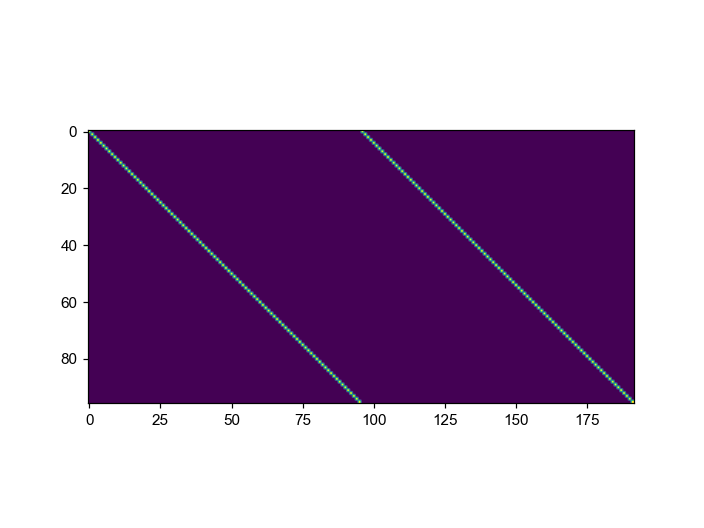

In [35]:
plt.figure()
plt.imshow(codebook.values[:,2:].astype(np.int32))
plt.show()

In [36]:
# sanity check
codebook.values[:,2:].sum(1)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [37]:
from scipy.spatial.distance import pdist, squareform
dist_mat = squareform(pdist(codebook.values[:,2:].astype(np.int32)))**2

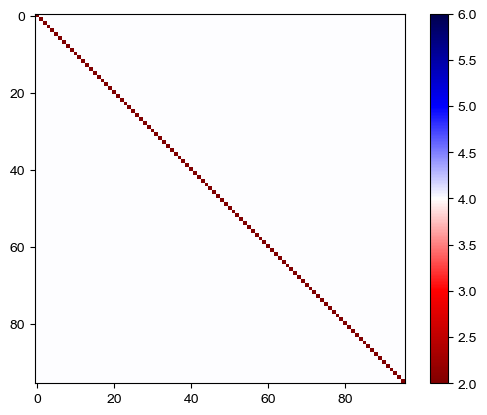

In [38]:
%matplotlib inline
fig, ax = plt.subplots()
_pf = ax.imshow(dist_mat, vmin=2, vmax=6, 
                cmap='seismic_r', interpolation=None)
plt.colorbar(_pf)
plt.show()

## append chromosome info

In [39]:
# add chromosome info
codebook['chr'] = [_n.split(':')[0] for _n in codebook['name']]
for _chr in np.unique(codebook['chr']):
    _chr_codebook = codebook.loc[codebook['chr']==_chr]
    _chr_reg_info = [np.mean([int(_loc) for _loc in _n.split(':')[1].split('-')]) for _n in _chr_codebook['name']]
    _chr_orders = np.array(_chr_reg_info).argsort().argsort().astype(np.int32)
    codebook.loc[codebook['chr']==_chr, 'chr_order'] = _chr_orders
# sort id
#codebook.sort_values('id', inplace=True)

'mouse_brain_relabel_chr7'

In [42]:
codebook_save_filename = os.path.join(save_folder, f'CTP14-{os.path.basename(library_folder)}_codebook_probe.csv')
if not os.path.exists(codebook_save_filename):
    print(codebook_save_filename)
    codebook.to_csv(codebook_save_filename,index=None)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\mouse_brain_relabel_chr7\Summary_tables\CTP14-mouse_brain_relabel_chr7_codebook_probe.csv


## Generate blanks

In [78]:
def convert_bits_to_matrix(bits):
    _matrix = np.ones([len(bits), np.max(bits)+1], dtype=np.int32) * -1
    for _i, _b in enumerate(bits):
        _matrix[_i, _b] = 1
    return _matrix

In [80]:
on_num = 3
total_num = len(readout_dict['c'])

encoding_file = os.path.join(library_folder, f'covering_v_{total_num}_k_{on_num}_t_2.txt')
loaded_barcodes = []

with open(encoding_file, 'r') as _handle:
    # start reading
    _lines = _handle.read().split('\n')
    for _line in _lines:
        _bits = [int(_i)-1 for _i in _line.split(' ') if len(_i) > 0]
        loaded_barcodes.append(_bits)

loaded_barcodes = np.array(loaded_barcodes, dtype=np.int32)
print(np.shape(loaded_barcodes))

# remove redundant barcodes
kept_barcodes = loaded_barcodes.copy()
kept_inds = np.zeros(len(kept_barcodes))
while np.sum(kept_inds) != len(kept_inds):
    kept_inds = np.ones(len(kept_barcodes), dtype=bool)
    _kept_mat = convert_bits_to_matrix(kept_barcodes)
    _dists = (total_num - (_kept_mat @ _kept_mat.T)) / 2
    _x, _y = np.where((_dists > 0) * (_dists <= 3))
    if len(_x) > 0:
        kept_inds[_x[0]] = False
        kept_barcodes = kept_barcodes[kept_inds]
        print(np.sum(kept_inds), kept_inds[_x[0]])
print(kept_barcodes.shape)

(1617, 3)
(1617, 3)


In [81]:
used_barcodes = []
for _reg, _code in region_2_readout_dict.items():
    _barcode = np.array([int(_c.split('c')[1]) for _c in _code])
    used_barcodes.append(_barcode)
used_barcodes = np.array(used_barcodes)

free_barcodes = []
for _barcode in kept_barcodes:
    if (used_barcodes == _barcode).all(1).any():
        continue
    else:
        free_barcodes.append(_barcode)

## generate a randomly selected blank

In [87]:
num_blank = 99

num_bits = len(readout_dict['c'])

blank_bit_usage = np.zeros(num_bits)
exist_bit_usage = np.zeros(num_bits)
for _b in used_barcodes:
    exist_bit_usage[_b] += 1
# init 
sel_blank_barcodes = []
# shuffle free barcodes
#np.random.shuffle(free_barcodes)
cand_barcodes = [_b for _b in free_barcodes]
while len(sel_blank_barcodes) < num_blank:
    # for each cand bit, estimate bit usage
    _bit_usages = np.array([exist_bit_usage[_c].sum() + blank_bit_usage[_c].sum() for _c in cand_barcodes])
    #_blank_bit_usages = np.array([blank_bit_usage[_c].sum() for _c in cand_barcodes])
    # randomly select one of the smallest used bits
    _min_inds = np.where(_bit_usages == np.min(_bit_usages))[0]
    _sel_min_ind = _min_inds[np.random.randint(len(_min_inds),)]
    # append
    _sel_barcode = cand_barcodes[_sel_min_ind].copy()
    sel_blank_barcodes.append(_sel_barcode)
    # pop this candidate
    cand_barcodes.pop(_sel_min_ind)
    # update usage
    blank_bit_usage[_sel_barcode] += 1
    exist_bit_usage[_sel_barcode] += 1
# check
np.unique(blank_bit_usage, return_counts=True)

(array([2., 3., 4.]), array([ 7, 85,  7], dtype=int64))

In [88]:
blank_bit_usage

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 2., 3., 3., 3.,
       3., 3., 3., 3., 2., 3., 2., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3.,
       3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 2., 3., 3., 4., 3., 3., 3., 4., 4., 3., 2.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3.])

## Save

In [89]:
print(save_folder)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_genome_library\Summary_tables


In [90]:
save_filename = os.path.join(save_folder, 'blank_barcodes.npy')
print(save_filename)
if not os.path.exists(save_filename):
    np.save(save_filename, np.array(sel_blank_barcodes))

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_genome_library\Summary_tables\blank_barcodes.npy


In [91]:
# generate the codebook_blank
codebook_blank = pd.DataFrame(columns=['name','id']+[_r.id for _r in readout_dict['c']])
max_bit = np.max([np.max([int(_b[1:]) for _b in _bits]) for _gname, _bits in region_2_readout_dict.items()]) + 1
# decide region ids first
_id_start = np.max((codebook['id']).values.astype(np.int32))+1
codebook_blank['id'] = np.arange(_id_start, _id_start+len(sel_blank_barcodes))
# decide region names
codebook_blank['name'] = [f'B:{_i}-{_i+1}' for _i in range(len(sel_blank_barcodes))]
for _i, _name in enumerate(codebook_blank['name']):
    _barcode = sel_blank_barcodes[_i]
    binary_code = np.zeros(max_bit, dtype=np.int32)
    binary_code[_barcode] = 1
    codebook_blank.loc[codebook_blank['name']==_name, codebook_blank.columns[2:]] = binary_code
# add chromosome info
codebook_blank['chr'] = [_n.split(':')[0] for _n in codebook_blank['name']]
for _chr in np.unique(codebook_blank['chr']):
    _chr_codebook_blank = codebook_blank.loc[codebook_blank['chr']==_chr]
    _chr_reg_info = [np.mean([int(_loc) for _loc in _n.split(':')[1].split('-')]) for _n in _chr_codebook_blank['name']]
    _chr_orders = np.array(_chr_reg_info).argsort().argsort().astype(np.int32)
    codebook_blank.loc[codebook_blank['chr']==_chr, 'chr_order'] = _chr_orders

In [92]:
# Merge blank with codebook
codebook_w_blank = pd.concat([codebook,codebook_blank], ignore_index=True)
# sanity check
np.unique(codebook_w_blank.values[:,2:-2].astype(int).sum(1))

array([3])

In [95]:
codebook_blank_save_filename = os.path.join(save_folder, 'CTP14-human_genome_codebook_probe_w_blank.csv')
if not os.path.exists(codebook_blank_save_filename):
    print(codebook_blank_save_filename)
    codebook_w_blank.to_csv(codebook_blank_save_filename,index=None)

\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-14_human_brain\human_genome_library\Summary_tables\CTP14-human_genome_codebook_probe_w_blank.csv
